## IMPORTANDO BIBLIOTECAS

In [1]:
# BIBLIOTECAS UTILIZADAS NESTE PROJETO

from collections import Counter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# VERSÕES DOS PACOTES USADOS NESTE JUPYTER NOTEBOOK
%reload_ext watermark
%watermark -a "Apolo Ferreira Santos" --iversions

Author: Apolo Ferreira Santos

seaborn   : 0.11.1
sklearn   : 0.24.1
pandas    : 1.2.4
matplotlib: 3.3.4
numpy     : 1.20.1



In [3]:
# CONFIGURAÇÃO PARA MOSTRAR TODAS COLUNAS DE UM DATAFRAME
pd.set_option("display.max_columns", None)

## <center>ANÁLISE DO CONJUNTO DE DADOS

In [4]:
# IMPORTANDO CONJUNTO DE DADOS DE TREINO
dataset = pd.read_csv('train.csv')

In [5]:
# VISUALIZAÇÃO DO DATASET
dataset.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [6]:
# FUNÇÃO PARA VERIFICAR O SHAPE DO DATASET, A EXISTÊNCIA DE VALORES NULOS E SUA QUANTIDADE

def valuesDataset(df):
    print('\033[1mTamanho do dataset\033[0m ->               {} x {}'.format(df.shape[0], df.shape[1]))
    print('\033[1mExiste valores faltantes:\033[0m           {}'.format(df.isnull().values.any()))
    print('\033[1mQuantidade de valores faltantes:\033[0m    {}'.format(df.isnull().values.sum()))
    print('\033[1mPorcentagem dos valores faltantes:\033[0m  {:.3}%'.format((df.isnull().values.sum()/(df.shape[0]*df.shape[1]) * 100)))    

In [7]:
# FAZENDO A CHAMADA DA FUNÇÃO
valuesDataset(dataset)

Tamanho do dataset ->               59381 x 128
Existe valores faltantes:           True
Quantidade de valores faltantes:    393103
Porcentagem dos valores faltantes:  5.17%


In [8]:
# FUNÇÃO PARA CALCULAR A PORCENTAGEM DE VALORES FALTANTES DE CADA COLUNA E ORGANIZAR EM UM DATAFRAME DE ORDEM DECRESCENTE

def missing_percentage(df):  
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]    
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]    
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [9]:
# CHAMANDO FUNÇÃO
df_missing = missing_percentage(dataset)

# VISUALIZANDO ATRIBUTOS COM DADOS FALTANTES E SUAS RESPECTIVAS PORCENTAGENS
df_missing

,Total,Percent
Medical_History_10,58824,99.06
Medical_History_32,58274,98.14
Medical_History_24,55580,93.60
Medical_History_15,44596,75.10
Family_Hist_5,41811,70.41
Family_Hist_3,34241,57.66
Family_Hist_2,28656,48.26
Insurance_History_5,25396,42.77
Family_Hist_4,19184,32.31
Employment_Info_6,10854,18.28


In [10]:
# CRIANDO LISTAS COM IDENTIFICAÇÃO DOS ATRIBUTOS COM DADOS FALTANTES QUE SERÃO MANTIDOS E EXCLUIDOS COM LIMIAR DE 70%
# ATRIBUTOS COM MAIS DE 70% DOS DADOS FALTANTES SERÃO EXCLUÍDOS

missing_values_drop = df_missing[df_missing.Percent >= 70].index.tolist()
missing_values_keep = df_missing[df_missing.Percent < 70].index.tolist()

In [11]:
# ATRIBUTOS COM VALORES FALTANTES ENTRE 70 E 0.02% DO TOTAL
dataset[missing_values_keep].describe().T

,count,mean,std,min,25%,50%,75%,max
Family_Hist_3,25140.0,0.497737,0.140187,0.0,0.401961,0.519608,0.598039,1.000000
Family_Hist_2,30725.0,0.474550,0.154959,0.0,0.362319,0.463768,0.579710,1.000000
Insurance_History_5,33985.0,0.001733,0.007338,0.0,0.000400,0.000973,0.002000,1.000000
Family_Hist_4,40197.0,0.444890,0.163012,0.0,0.323944,0.422535,0.563380,0.943662
Employment_Info_6,48527.0,0.361469,0.349551,0.0,0.060000,0.250000,0.550000,1.000000
Medical_History_1,50492.0,7.962172,13.027697,0.0,2.000000,4.000000,9.000000,240.000000
Employment_Info_4,52602.0,0.006283,0.032816,0.0,0.000000,0.000000,0.000000,1.000000
Employment_Info_1,59362.0,0.077582,0.082347,0.0,0.035000,0.060000,0.100000,1.000000


In [12]:
# VISUALIZANDO INFORMAÇÕES INDIVIDUAIS DE CADA ATRIBUTO
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    Id                   59381 non-null  int64  
 1    Product_Info_1       59381 non-null  int64  
 2    Product_Info_2       59381 non-null  object 
 3    Product_Info_3       59381 non-null  int64  
 4    Product_Info_4       59381 non-null  float64
 5    Product_Info_5       59381 non-null  int64  
 6    Product_Info_6       59381 non-null  int64  
 7    Product_Info_7       59381 non-null  int64  
 8    Ins_Age              59381 non-null  float64
 9    Ht                   59381 non-null  float64
 10   Wt                   59381 non-null  float64
 11   BMI                  59381 non-null  float64
 12   Employment_Info_1    59362 non-null  float64
 13   Employment_Info_2    59381 non-null  int64  
 14   Employment_Info_3    59381 non-null  int64  
 15   Employment_Info_4

In [13]:
# FAZENDO O AGRUPAMENTO DOS TIPOS DE VARIÁVEIS DE CADA TRIBUTO

dtype_data = dataset.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,109
1,float64,18
2,object,1


In [14]:
# FUNÇÃO PARA FAZER A CONTAGEM DE QUANTOS VALORES ÚNICOS TEM CADA ATRIBUTO

def uniqueValues(df):
    df = df.drop(columns=['Response','Id'], axis=1)
    count_values = {}
    features_group = {}
    two_values = []
    tree_values = []
    more_values = []  
    
    for column in df.columns:
        unique_values = df[column].unique()
        len_unique = len(unique_values)
        count_values[column] = len_unique
        
        if len_unique == 2:
            two_values.append(column)            
        elif len_unique == 3:            
            tree_values.append(column)
        else:            
            more_values.append(column)
            
    features_group[2] = two_values
    features_group[3] = tree_values
    features_group['more'] = more_values    
    features_group = pd.DataFrame(data=features_group.items(), columns=['unique_values', 'features'])     
    
    df_unique = pd.DataFrame(data=count_values.items(), columns=['Features', 'Unique_values'])
    df_unique.sort_values(by='Unique_values', ascending=True, inplace=True)
    df_unique.reset_index(inplace=True, drop=True)
    df_unique = df_unique
    return df_unique, features_group

In [15]:
# CHAMANDO A FUNÇÃO
df_unique_values, df_group = uniqueValues(dataset)

In [16]:
# VISUALIZANDO QUANTOS VALORES ÚNICOS TEM CADA ATRIBUTO
df_unique_values.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
Features,Product_Info_1,Medical_Keyword_20,Medical_Keyword_19,Medical_Keyword_18,Medical_Keyword_17,Medical_Keyword_16,Medical_Keyword_15,Medical_Keyword_14,Medical_Keyword_13,Medical_Keyword_12,Medical_Keyword_11,Medical_Keyword_21,Medical_Keyword_10,Medical_Keyword_8,Medical_Keyword_7,Medical_Keyword_6,Medical_Keyword_5,Medical_Keyword_4,Medical_Keyword_3,Medical_Keyword_2,Medical_Keyword_1,Medical_History_38,Medical_History_33,Medical_Keyword_9,Medical_Keyword_47,Medical_Keyword_22,Medical_Keyword_24,Medical_Keyword_46,Medical_Keyword_45,Medical_Keyword_44,Medical_Keyword_43,Medical_Keyword_42,Medical_Keyword_41,Medical_Keyword_40,Medical_Keyword_39,Medical_Keyword_38,Medical_Keyword_37,Medical_Keyword_23,Medical_Keyword_36,Medical_Keyword_34,Medical_Keyword_33,Medical_Keyword_32,Medical_Keyword_31,Medical_Keyword_30,Medical_Keyword_29,Medical_Keyword_28,Medical_Keyword_27,Medical_Keyword_26,Medical_Keyword_25,Medical_Keyword_35,Medical_History_22,Medical_Keyword_48,InsuredInfo_4,Product_Info_5,Product_Info_6,Employment_Info_3,Employment_Info_5,Medical_History_4,InsuredInfo_2,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Medical_History_3,Medical_History_5,Medical_History_16,Medical_History_6,Medical_History_7,Family_Hist_1,Insurance_History_9,Insurance_History_2,Insurance_History_7,Insurance_History_4,Insurance_History_3,Medical_History_8,InsuredInfo_1,Product_Info_7,Insurance_History_8,Medical_History_9,Medical_History_26,Medical_History_41,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_14,Medical_History_23,Medical_History_25,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_13,Medical_History_40,Medical_History_34,Medical_History_35,Medical_History_12,Medical_History_36,Medical_History_11,Medical_History_37,Medical_History_39,InsuredInfo_3,Product_Info_2,Product_Info_3,Employment_Info_2,Ht,Ins_Age,Family_Hist_2,Family_Hist_4,Family_Hist_3,Family_Hist_5,Medical_History_32,Medical_History_10,Medical_History_1,Medical_History_24,Medical_History_15,Wt,Medical_History_2,Employment_Info_4,Employment_Info_6,Product_Info_4,Employment_Info_1,Insurance_History_5,BMI
Unique_values,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,11,19,34,36,39,65,69,69,91,91,96,104,172,228,242,300,579,872,993,1491,1937,2266,3256


In [17]:
# FAZENDO AGRUPAMENTO DOS ATRIBUTOS PELA QUANTIDADE DE VALORES ÚNICOS
df_unique_values.groupby('Unique_values').count()

,Features
Unique_values,
2,63
3,40
11,1
19,1
34,1
36,1
39,1
65,1
69,2


In [18]:
# CRIANDO UMA LISTA INDIVIDUAL COM O NOME DOS ATRIBUTOS COM 2 VALORES ÚNICOS, 3 VALORES ÚNICOS E MAIS DE 3 VALORES ÚNICOS

two_values = df_group[df_group.unique_values == 2]['features'].item()
tree_values = df_group[df_group.unique_values == 3]['features'].item()
more_values = df_group[df_group.unique_values == 'more']['features'].item()

In [19]:
# VERIFICANDO A EXISTÊNCIA DE VALORES FALTANTES EM CADA UMA DAS LISTA DE CONTAGEM DE VALORES ÚNICOS

for row in df_group.itertuples():
    if set(row.features).intersection(missing_values_keep):
        print('Existe valores faltantes na lista      "two_values"') if row.unique_values==2 else print('Não existe valores faltantes na lista: "two_values"')
        print('Existe valores faltantes na lista      "tree_values"') if row.unique_values==3 else print('Não existe valores faltantes na lista: "tree_values')
        print('Existe valores faltantes na lista      "more_values"') if row.unique_values=='more' else print('Não existe valores faltantes na lista: "more_values')

Não existe valores faltantes na lista: "two_values"
Não existe valores faltantes na lista: "tree_values
Existe valores faltantes na lista      "more_values"


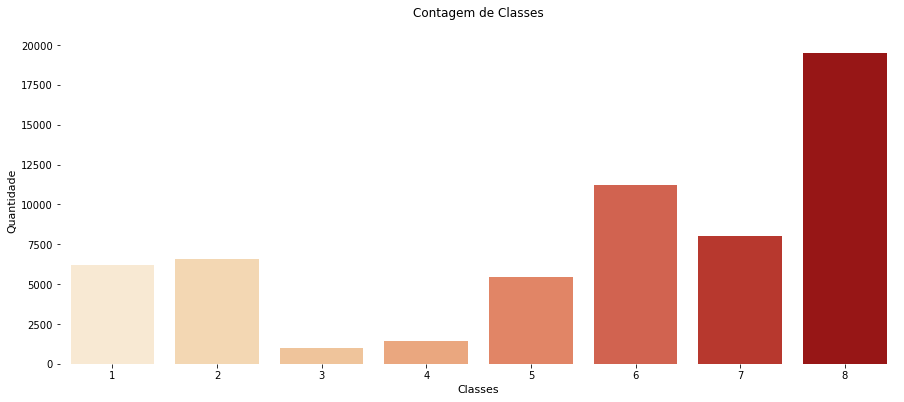

In [20]:
# PLOTANDO A QUANTIDADE DE AMOSTRAS POR CLASSE

plt.figure(figsize=(15,6))
sns.countplot(data=dataset, x='Response', palette = "OrRd")
plt.box(False)
plt.xlabel('Classes', fontsize = 11)
plt.ylabel('Quantidade', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [21]:
# MAIORES CORRELAÇÕES POSITIVAS E NEGATIVAS EM RELAÇÃO A VARIÁVEL ALVO

corr_positivo = dataset.corr()['Response'].sort_values(ascending=False)[0:10]
corr_negative = dataset.corr()['Response'].sort_values(ascending=True)[0:10]
correlacao = pd.concat([corr_positivo, corr_negative], axis=1, keys=['Corr Positiva','Corr Negativa'])

In [22]:
# VISUALIZANDO CORRELAÇÕES
correlacao

,Corr Positiva,Corr Negativa
Response,1.000000,NaN
Medical_History_23,0.286584,NaN
Medical_History_15,0.277311,NaN
Medical_History_4,0.239896,NaN
Medical_History_39,0.220176,NaN
Product_Info_4,0.202434,NaN
Medical_History_6,0.159230,NaN
Medical_History_32,0.144536,NaN
Medical_History_13,0.134863,NaN
Medical_History_40,0.131519,NaN


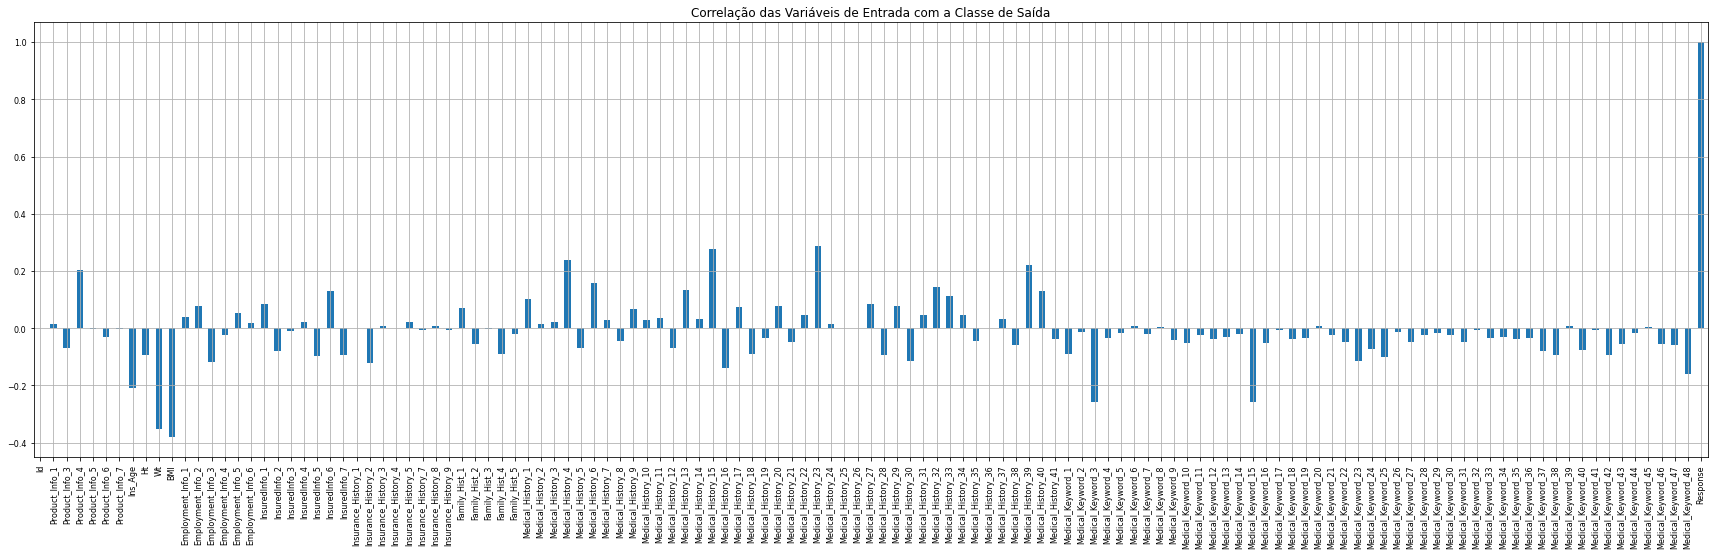

In [23]:
# PLOTANDO GRÁFICO PARA VISUALIZAÇÃO DAS CORRELAÇÕES COM A CLASSE

dataset.corrwith(dataset.Response).plot.bar(figsize = (30, 8), 
                                                   title = "Correlação das Variáveis de Entrada com a Classe de Saída", 
                                                   fontsize = 8,
                                                   grid = True, 
                                                   legend=False)
plt.show()

# <center>ENGENHARIA DE ATRIBUTOS

In [24]:
# SEPARANDO OS ATRIBUTOS DA VARIÁVEL ALVO E REMOVENDO ATRIBUTOS COM VALORES FALTANTES ACIMA DE 70%

x = dataset.drop(columns = missing_values_drop + ['Response', 'Id'], axis=1)
y_train = dataset[['Response']].values.ravel()

In [25]:
# VISUALIZANDO ATRIBUTOS DO TIPO 'OBJECT' DO DATASET
list(x.select_dtypes(include=['object']).columns)

['Product_Info_2']

In [26]:
# VISUALIZANDO OS VALORES DO ATRIBUTO TIPO 'OBJECT'
x['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [27]:
# SEPARANDO OS CARACTERES ALFABÉTICOS E NUMÉRICOS DA VARIÁVEL 'PRODUCT_INFO_2' E CRIANDO UMA NOVA COLUNA PARA CADA
x['Product_Info_2_char'] = x.Product_Info_2.str[0]
x['Product_Info_2_num'] = x.Product_Info_2.str[1]

# OBTENDO OS CARACTERES ÚNICOS E OS ORDENANDO EM ORDEM DECRESCENTE
producto_info_2_char = np.sort(x['Product_Info_2_char'].unique()).tolist()

# ELIMINANDO A COLUNA QUE FOI DESDOBRADA EM DUAS
x = x.drop(columns='Product_Info_2', axis=1)

# Criando Pipeline para Tratamento dos Dados

In [28]:
# PIPELINE PARA TRATAMENTO DOS ATRIBUTOS NUMÉRICOS

pipeline_numerical = Pipeline([                            
                            ('simple_imputer', SimpleImputer(strategy='mean')), 
                            ('iterative_imputer', IterativeImputer())
                            ])

In [29]:
# PIPELINE PARA TRATAMENTO DOS ATRIBUTOS TIPO OBJECT
pipeline_object = Pipeline([('ordinal_encoder', OrdinalEncoder(categories=[producto_info_2_char]))])

In [30]:
# FAZENDO TRANFORMAÇÕES NOS ATRIBUTOS UTILIZADOS NOS PIPELINES

ct_preprocessor = ColumnTransformer([
                            ('numerical', pipeline_numerical, missing_values_keep), 
                            ('object', pipeline_object, ['Product_Info_2_char'])
                            ], remainder='passthrough')

In [31]:
# TREINAMNDO ALGORITMO PARA TRATAMENTO DOS DADOS
ct_preprocessor.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer()),
                                                 ('iterative_imputer',
                                                  IterativeImputer())]),
                                 ['Family_Hist_3', 'Family_Hist_2',
                                  'Insurance_History_5', 'Family_Hist_4',
                                  'Employment_Info_6', 'Medical_History_1',
                                  'Employment_Info_4', 'Employment_Info_1']),
                                ('object',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['A',
                                                                              'B',
                                                         

In [32]:
# TRANSFORMANDO OS DADOS E ATRIBUINDO-OS A UM DATAFRAME
x_train = pd.DataFrame(ct_preprocessor.transform(x), columns=x.columns.tolist())

In [33]:
# VISUALIZANDO DADOS TRATADOS
x_train.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_char,Product_Info_2_num
0,0.598039,0.47455,0.000667,0.44489,0.361469,4.0,0.0,0.028,3.0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,12,1,3,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0.497737,0.188406,0.000133,0.084507,0.0018,5.0,0.0,0.0,0.0,1,26,0.076923,2,3,1,0.059701,0.6,0.131799,0.272288,1,3,2,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.497737,0.304348,0.001733,0.225352,0.03,10.0,0.0,0.03,4.0,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.42878,9,1,2,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.497737,0.42029,0.001733,0.352113,0.2,0.0,0.0,0.042,3.0,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,9,1,3,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0.497737,0.463768,0.001733,0.408451,0.05,7.962172,0.0,0.027,3.0,1,26,0.230769,2,3,1,0.41791,0.654545,0.23431,0.424046,9,1,2,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


# Balanceamento das Classes

-> SMOTE cria dados sinteticos para os atributos minoritários dentro da variação padrão, fazendo assim o balanceanto igualitário da distribuição de dados para cada classe alvo.

-> SMOTE + ENN é uma técnica híbrida de sub-amostragem onde os vizinhos mais próximos da classe majoritária são estimados. Caso os vizinhos mais próximos classifiquem incorretamente essa instância 
  particular da classe majoritária, então essa instância é excluída.
   O resultado do balanceamento ocorre de forma inversa a distribuição normal da entrada de dados. 
   Considerando que o modelo recebera mais dados de uma determinada classe ele gera menos valores da mesma, visto que o modelo tende a prever com mais frequência
  as classes que mais foram analisadas no treinamento. Ou seja, se treinarmos com mais dados as classes que naturalmente tem um quantidade menor, o modelo não terá dificuldade para prevê-las em operação.

In [34]:
# CONTAGEM DE CADA CLASSE
counter = Counter(y_train)

In [35]:
# CRIANDO SMOTEENN
smote_enn = SMOTEENN(sampling_strategy='all')

In [36]:
# TREINANDO E APLICANDO BALANCEAMENTO DAS CLASSES
x_balanced, y_balanced = smote_enn.fit_resample(x_train, y_train)

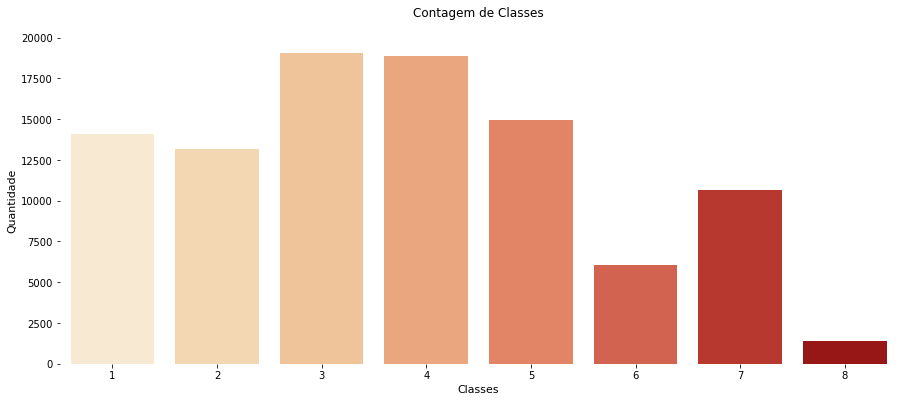

In [37]:
# PLOTANDO QUANTIDADE DE AMOSTRAS POR CLASSE ÁPOS BALANCEAMENTO

plt.figure(figsize=(15,6))
sns.countplot(x=y_balanced, palette = "OrRd")
plt.box(False)
plt.xlabel('Classes', fontsize = 11)
plt.ylabel('Quantidade', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [38]:
# VISUALIZANDO ALTERAÇÕES FEITAS NO TAMANHO DO DADOS

print('Shape dos dados de treino antes do balanceamento  -> atributos:{}    label:{}'.format(x_train.shape, y_train.shape))
print('Shape dos dados de treino depois do balanceamento -> atributos:{}    label:{}'.format(x_balanced.shape, y_balanced.shape))

Shape dos dados de treino antes do balanceamento  -> atributos:(59381, 122)    label:(59381,)
Shape dos dados de treino depois do balanceamento -> atributos:(98269, 122)    label:(98269,)


## Salvando dados tratados em um csv

In [55]:
train_data = pd.DataFrame(x_balanced, columns=x.columns.tolist())
train_data['Response'] = y_balanced

In [56]:
train_data.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_char,Product_Info_2_num,Response
0,0.497737,0.797101,0.000667,0.44489,0.05,7.962172,0.0,0.025,4.0,1.0,21.0,0.076923,2.0,3.0,1.0,0.552239,0.6,0.284519,0.587796,1.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0,3.0,162.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.5,0.47455,0.001733,0.661972,0.05,6.0,0.0,0.1,3.0,1.0,26.0,0.230769,2.0,3.0,1.0,0.447761,0.727273,0.330544,0.51639,9.0,1.0,2.0,1.0,2.0,6.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,3.0,112.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
2,0.578431,0.47455,0.000667,0.44489,1.0,7.962172,0.006283,0.15,3.0,1.0,26.0,0.076923,2.0,3.0,1.0,0.791045,0.818182,0.560669,0.758997,12.0,1.0,2.0,1.0,2.0,6.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0,3.0,162.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.431373,0.47455,0.001733,0.44489,0.361469,1.0,0.0,0.02,0.0,1.0,26.0,0.025641,2.0,1.0,1.0,0.492537,0.745455,0.320084,0.479639,9.0,1.0,2.0,2.0,2.0,8.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,3.

In [57]:
train_data.to_csv("/train_data_trated.csv")

# <center>CRIANDO MODELO

## Otimização de Hyper-Parâmetros

In [53]:
# PARÂMETROS A SEREM TESTADOS

param = {'min_samples_leaf': [1, 3, 5, 7], 
        'max_features': ['auto', 'sqrt', 'log2']}

In [54]:
# CRIANDO OTMIZADOR DE PARÂMETROS

grid_search = GridSearchCV(estimator = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=42), 
                           param_grid = param, 
                           cv = 5)

In [55]:
# REALIZANDO TREINAMENTO
grid_random_forest = grid_search.fit(x_balanced, y_balanced)

In [56]:
# VISUALIZANDO A MELHOR COMBINAÇÃO DE PARÂMETROS
grid_search.best_estimator_

RandomForestClassifier(max_features='log2', n_estimators=50, random_state=42)

In [57]:
# VISUALIZANDO A MELHOR COMBINAÇÃO DE PARÂMETROS DENTRO DAS OPÇÕES DADAS
grid_search.best_params_

{'max_features': 'log2', 'min_samples_leaf': 1}

In [58]:
# MELHOR PONTUAÇÃO OBTIDA NO TREINAMENTO
grid_search.best_score_

0.8440200136456252

## Curvas de Validação

-> A curva de validação serve para verificar como se comporta a pontuação do modelo em detrimento da alteração de algum hyper-parâmetro.<br>
-> Neste caso, foi alterado o número de árvores utilizados pelo algoritmo RandomForestClassifier.

In [61]:
# CRIANDO ARRAY COM VALORES PARA SEREM TESTADOS ([ 20,  60, 100, 140, 180, 220, 260, 300])
range_estimators = np.arange(20, 301, 40)

In [62]:
# EXECUÇÃO DO ALGORITMO DE VALIDAÇÃO

train_scores, test_scores = validation_curve(RandomForestClassifier(criterion='gini', max_features='log2',  min_samples_leaf=1), 
                                             x_balanced, y_balanced, 
                                             param_name = 'n_estimators', 
                                             param_range = range_estimators,
                                             cv = 10, 
                                             scoring = 'accuracy')

In [63]:
# OBTENDO MÉDIAS E DESVIO PADRÃO PARA PLOTAGEM

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

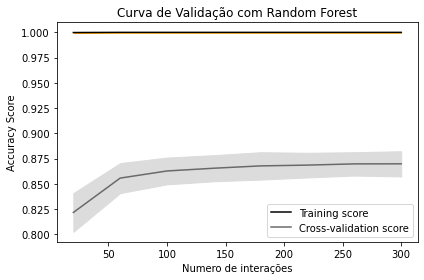

In [64]:
# PLOTAGEM DA CURVA DE VALIDAÇÃO DE PARÂMETRO

plt.plot(range_estimators, train_mean, label="Training score", color="black")
plt.plot(range_estimators, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(range_estimators, train_mean - train_std, train_mean + train_std, color="orange")
plt.fill_between(range_estimators, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Curva de Validação com Random Forest")
plt.xlabel("Numero de interações")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Curva de Aprendizado

-> A Learning Curve realiza o treinamento através de validação cruzada com diferentes tamanhos de dados de treino e faz a avaliação.<br>
-> Através desta curva pode-se concluir que o modelo provavelmente apresentaria melhores resultados com mais dados para treino.<br>
   Pois a curva de aprendizado ainda não se estabilizou lateralmente. 

In [65]:
# EXECUÇÃO DO ALGORITMO DE CURVA DE APRENDIZADO

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=200, criterion='gini', max_features='log2',  min_samples_leaf=1), 
                                          x_balanced, y_balanced, 
                                          cv = 5, 
                                          scoring = 'accuracy', 
                                          train_sizes = np.linspace(0.1, 1.0, 10))

In [66]:
# OBTENDO MÉDIAS E DESVIO PADRÃO PARA PLOTAGEM

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

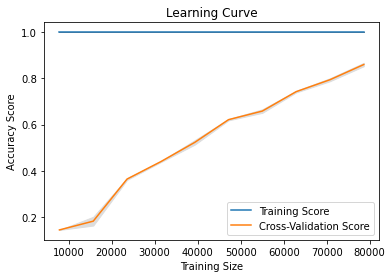

In [67]:
# PLOTAGEM DA CURVA DE APRENDIZADO

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='gray')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

# <center>VALIDAÇÃO E AVALIAÇÃO

In [68]:
# CRIANDO MODELO DEFINITIVO COM OS MELHORES HYPER-PARÂMETROS ENCONTRADOS PELOS TESTES ACIMA

random_forest = RandomForestClassifier(n_estimators=250, criterion='gini', max_features='log2',  min_samples_leaf=1)

In [69]:
# REALIZANDO TREINAMENTO E AVALIAÇÃO POR VALIDAÇÃO CRUZADA

scores = cross_val_score(random_forest, x_balanced, y_balanced, cv=10, scoring="accuracy")

In [72]:
# MÉDIA DA PONTUAÇÃO DO MODELO
scores.mean().round(6)

0.870224

## Treinamento

In [73]:
modelo_random_forest = random_forest.fit(x_train, y_train)

## Previsões

In [74]:
y_train_pred = modelo_random_forest.predict(x_train)

# <center>AVALIAÇÃO DADOS DE TREINO

-> A matrix de confusão da previsão dos resultados com os dados de treino não aprensentou erros.<br>
   Entretando é necessário a avaliação com dados de teste.<br>
   Como dito inicialmente, estes dados são dados reais de uma competição do Kaggle e não foi disponibilizado as respostas para os dados de teste.
   
-> Estava ancioso para postagem do meu primeiro projeto no Github por isso ainda não postei no Kaggle.
   A competição já esta fechada mas farei minha publicação na competição. E atualizei este código.   

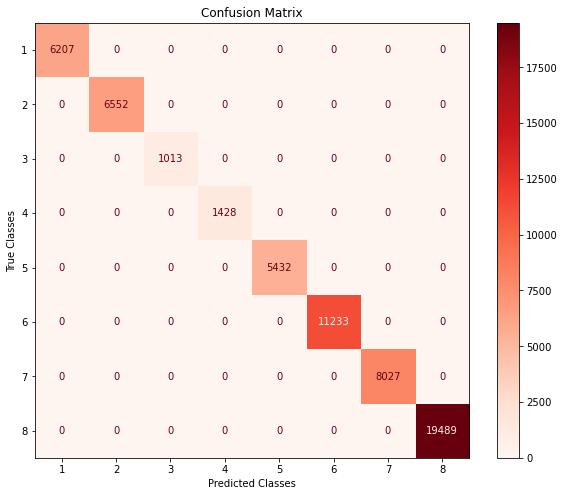

In [75]:
matrix = plot_confusion_matrix(modelo_random_forest, x_train, y_train, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Classes', color='black')
plt.ylabel('True Classes', color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,8)
plt.show()